# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. 
Vamos nos concentrar nas ações dos banco e ver como eles performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

,GS10
DATE,
2016-03-01,1.89
2016-04-01,1.81
2016-05-01,1.81
2016-06-01,1.64
2016-07-01,1.50
2016-08-01,1.56
2016-09-01,1.63
2016-10-01,1.76
2016-11-01,2.14


## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Definindo os níveis dos nomes das colunas **

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.596096  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.228691  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.272778  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.221321  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.243366  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.786667  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.811905  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.912865  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.950710  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.341850  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

# Análise de dados exploratória

** Qual é o preço máximo de fechamento para o estoque de cada banco durante todo o período? **

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Criando um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Criando um loop for que vá e para cada Bank Stock Ticker, criando essa coluna de retorno e configurando-a como uma coluna nos dados DataFrame. **

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** parplot utilizando seaborn no dataframe de retorno. **

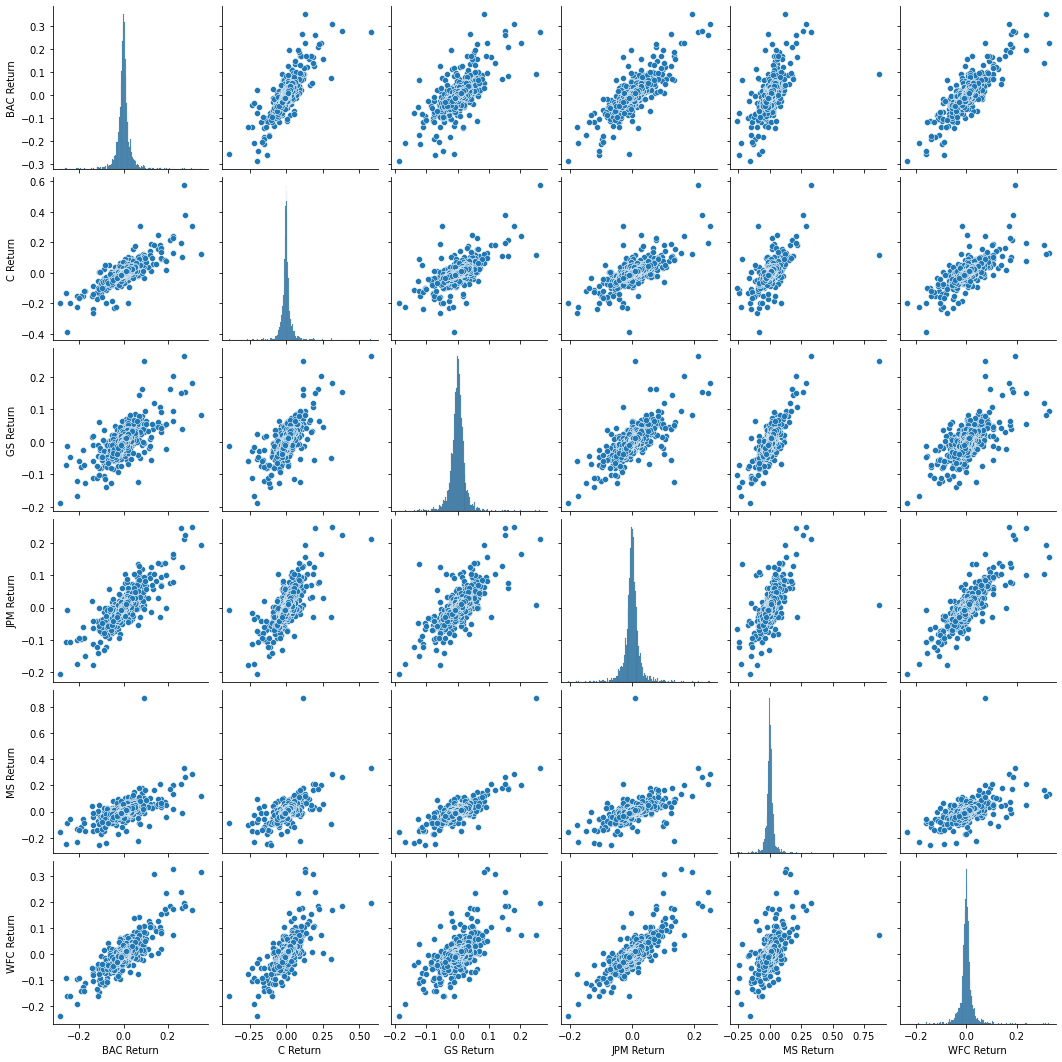

In [13]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [41]:
returns['BAC Return']

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
                ...   
2015-12-24   -0.004037
2015-12-28   -0.008107
2015-12-29    0.008757
2015-12-30   -0.013310
2015-12-31   -0.012903
Name: BAC Return, Length: 2517, dtype: float64

In [43]:
returns['BAC Return'].max()

0.35269125610998264

In [44]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [46]:
returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64